# NDBI048 Data science projekt

V tomto projektu budeme analyzovat datasety [World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness?resource=download) a [Countries of the World](https://www.kaggle.com/datasets/fernandol/countries-of-the-world). Budeme hledat souvislosti mezi štěstím populace státu a různými ukazateli jako je gramotnost, hrubý domácí produkt a další. Report je rozdělen do následujících částí. První si naplánujeme, jak budeme při analýze postupovat. Následně popíšeme data, se kterými budeme pracovat. Poté budeme dělat explorační analýzu. Pak TODO. Na závěr si shrneme získané poznatky a průběh analýzy. Pro samotnou analýzu dat použijeme technologie Python, matplotlib a scipy.

## Plán analýzy

TODO

## Data

Dataset týkající se štěstí populace státu obsahuje data z let 2015 až 2019 a je dostupný ve formátu CSV. Pro jednoduchost budeme analýzu provádět pouze pro rok 2019, která mají velikost 9 KB a obsahuje data o 157 zemích. Data z roku 2019 obsahuje následující sloupce (popis jednotlivých sloupců je převzaný z [přílohy World Happiness Report](https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf), který byl k datasetu vydán):

- Overall rank - pozice při setřízení dle štěstí populace
- Country or region - země či region, jichž se řádek týká
- Score - Měření subjektivní pohody (SWB) pochází z vydání Gallup World Poll (GWP) z 26. února 2021 a pokrývá roky 2005 až 2020. Pokud není uvedeno jinak, jde o národní průměr odpovědí na otázku týkající se hodnocení života. Překlad znění otázky do Českého jazyka je následující: „Představte si žebřík, jehož stupně jsou očíslovány od 0 na spodním konci po 10 na horním konci. Vrchol žebříku představuje nejlepší možný život pro vás a spodní část žebříku nejhorší možný život pro vás. Na kterém stupni žebříku byste řekli, že se osobně nacházíte v tuto chvíli?“ Toto měření je také označováno jako Cantrilův žebřík života.
- GDP per capita - Hrubý domací produkt na obyvatele v paritě kupní síly (PPP) v konstantních mezinárodních cenách dolaru roku 2017 pochází z aktualizace Světových vývojových indikátorů (WDI) z 14. října 2020. Údaje o HDP pro Tchaj-wan, Sýrii, Palestinu, Venezuelu, Džibuti a Jemen pocházejí z Penn World Table 9.1.
- Social support - (nebo mít někoho, na koho se lze spolehnout v těžkých časech) je národní průměr binárních odpovědí (buď 0, nebo 1) na otázku GWP „Kdybyste měli problém, máte příbuzné nebo přátele, na které se můžete kdykoliv obrátit s žádostí o pomoc?“
- Healthy life expectancy - Očekávaná délka zdravého života při narození je založena na datech získaných z datového úložiště Světové zdravotnické organizace (WHO) Global Health Observatory (Poslední aktualizace: 28. září 2020). Data jsou dostupná pro roky 2000, 2005, 2010, 2015 a 2016. Aby odpovídala období sledovanému v této zprávě (2005–2020), byla použita interpolace a extrapolace.
- Freedom to make life choices - je národní průměr odpovědí na otázku GWP „Jste spokojeni nebo nespokojeni se svou svobodou rozhodovat, co dělat se svým životem?“
- Generosity - je reziduál regrese národního průměru odpovědí na otázku GWP „Darovali jste v minulém měsíci peníze na charitu?“ vzhledem k HDP na obyvatele.
- Perceptions of corruption - Toto měření je národní průměr odpovědí v průzkumu na dvě otázky v GWP: „Je korupce rozšířená ve vládě, nebo ne?“ a „Je korupce rozšířená v podnicích, nebo ne?“ Celkové vnímání je průměrem těchto dvou odpovědí (0 nebo 1). V případě, že chybí údaje o korupci ve vládě, používáme údaje o korupci v podnicích jako celkové vnímání. Vnímání korupce na národní úrovni je jednoduše průměrem individuálního vnímání.

Dataset týkající se metrik zemí světa je složen z několika veřejných datasetů a je dostupný ve formátu CSV. Velikost datasetu je 38 KB a popisuje metriky pro 228 zemí. Sloupce obsahující základní geografická data jako je populace, či rozloha obsahují hodnoty pro všechny země v tabulce. Ostatní metriky jako gramotnost nejsou dostupné pro všechny země v tabulce, ale vždy chybí pouze několik jednotek hodnot. Chybějící hodnoty by neměly zásadně ovlivnit naši analýzu. Popisy jednotlivých sloupců bylo potřeba najít v dokumentací zdrojových datasetů. Mnoho z těchto datasetů bohužel popisy sloupců neobsahovaly a proto je popis nahrazen pouhým překladem názvu sloupce. Nedostupnost popisu jednotlivých sloupců značně komplikuje analýzu a snížuje důvěryhodnost datasetu.

- Country – Země
- Region – Region
- Population – Populace
- Area (sq. mi.) – Rozloha (čtvereční míle)
- Pop. Density (per sq. mi.) – Hustota obyvatelstva (na čtvereční míli)
- Coastline (coast/area ratio) – Pobřeží (poměr pobřeží k rozloze)
- Net migration – Čistá migrace
- Infant mortality (per 1000 births) – Úmrtnost kojenců (na 1000 narozených)
- GDP ($ per capita) – HDP (v dolarech na obyvatele)
- Literacy (%) – Gramotnost (%)
- Phones (per 1000) – Telefony (na 1000 obyvatel)
- Arable (%) – Orná půda (%)
- Crops (%) – Zemědělské plodiny (%)
- Other (%) – Ostatní (%)
- Climate – Hodnota popisuje podnebí. 1 znamená suché tropické nebo tundra a led, klasifikace B a E. 2 znamená vlhké tropické, klasifikace A. 3 znamená mírně vlhké, subtropické a mirné kontinentální, klasifikace Cfa, Cwa a D. 4 znamená suché a teplé léta a vlkhé zimy.
- Birthrate – Porodnost
- Deathrate – Úmrtnost
- Agriculture – Zemědělství
- Industry – Průmysl
- Service – Služby

### Čištění dat

V této podsekci se budeme zabývat čištěním a normalizací dat.

V datasetu s metrikami zemí ve sloupci "Country" končí každá hodnota mezerou. To znemožňuje sloučení s druhým datasetem na základě názvu země. Proto je potřeba z těchto hodnot smazat bílé znaky z okrajů řetězců. Po sloučení tabulek na základě názvu země tímto způsobem bychom získali ve výsledném tabulce 142 řádků. Oba datasety mají však více řádků, čímž se dostáváme k dalšímu problému.

Užité datsety používají různé identifikátory států, např. dataset o štěstí populace používá název "Trinidad and Tobago" zatímco dataset s metrikami zemí použá pro stejný stát název "Trinidad & Tobago". Budeme potřebovat sofistikovanější způsob nežli pouhé porovnání na rovnost. Před samotným sloučením v obou datasetech sjednotíme názvy zemí použítím Python balíčku `pycountry`, který umí dělat fuzzy hledání v databázi zemí. Tímto způsobem ve výsledné tabulce dostaneme 146 řádků.

## Import dat a normalizace

In [1]:
import numpy as np
import pandas as pd
import pycountry

def standardize_country_name(country_name):
    """
    Try fuzzy matching against a DB of country names.
    Otherwise at least trim whitespace.
    """
    stripped_country_name = country_name.strip()
    try: 
        return pycountry.countries.search_fuzzy(stripped_country_name)[0].name
    except LookupError:
        return stripped_country_name
    

countries_of_the_world = pd.read_csv(
    './data/countries_of_the_world/countries_of_the_world.csv',
    dtype={"Literacy (%)": np.float32}, 
    decimal=','
)

countries_of_the_world["Country"] = \
    countries_of_the_world["Country"].apply(standardize_country_name)

happiness = pd.read_csv(
    './data/world_happiness/2019.csv',
    dtype={
        "Score": np.float32
        }
    )

happiness["Country or region"] = \
    happiness["Country or region"].apply(standardize_country_name)

## Sloučení tabulek

Pročišěné tabulky nyní sloučíme a ověříme, že velikost výsledné tabulky je dostatečná.

In [5]:
print('Velikost tabulky "Countries of the world":', len(countries_of_the_world))
print('Velikost tabulky "World happiness":', len(happiness))
print()

merged = pd.merge(
    countries_of_the_world, 
    happiness, 
    how="inner", 
    left_on="Country", 
    right_on="Country or region"
    )

print("Velikost sloučené tabulky: ", len(merged))

Velikost tabulky "Countries of the world": 227
Velikost tabulky "World happiness": 156

Velikost sloučené tabulky:  146


Až na pár jednotek řádků se podařilo tabulky sloučit, což bude pro naši analýzu dostatečné.

## Explorační analýza

První se podíváme na vztah mezi skórem štěstí a gramotností populace.

Countries considered:  144


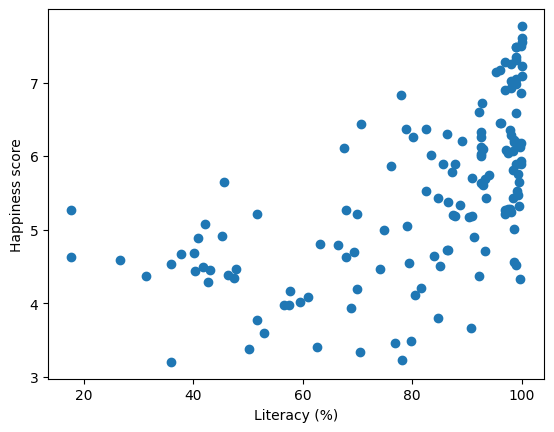

In [3]:
import matplotlib.pyplot as plt

# if happiness score or literacy is unknown, ignore country
filtered = \
    merged[~np.isnan(merged["Literacy (%)"]) & ~np.isnan(merged["Score"])]

print("Countries considered: ", len(filtered))

plt.scatter(filtered["Literacy (%)"], filtered["Score"])
plt.xlabel("Literacy (%)")
plt.ylabel("Happiness score")
plt.show()

Na první pohled nevypadá vztah úplně silně, ale na levé polovině grafu (nízká gramotnost) jsou hodnoty skóre menší než 6 a na pravé straně grafu (vysoká gramotnost) jsou hodnoty štěstí i nad 7. Tento vztah je dobrý kandidát na lineární regresi.


sklon (směrnice): 0.0309410131672757
regresní konstanta (absolutní člen): 2.9475301176271587
r^2 0.34958022333285066
p-hodnota: 6.089337179115913e-15
std-err: 0.0035417165401579556

p < 0.05: True


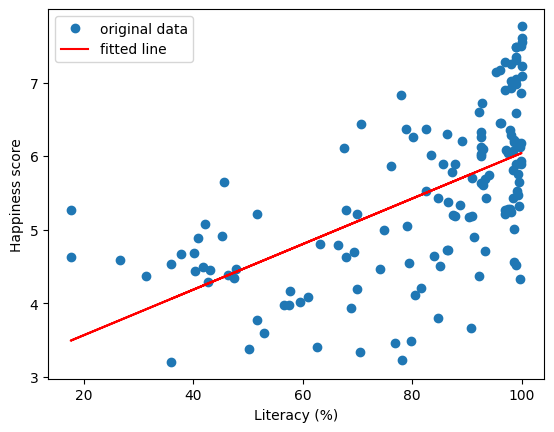

In [4]:
from scipy import stats

x = filtered["Literacy (%)"]
y = filtered["Score"]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print("sklon (směrnice):", slope)
print("regresní konstanta (absolutní člen):", intercept)
print("r^2", r_value ** 2)
print("p-hodnota:", p_value)
print("std-err:", std_err)

print()

trust = 0.05
print(f"p < {trust}:", p_value < trust)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("Literacy (%)")
plt.ylabel("Happiness score")
plt.legend()
plt.show()

Při volbě hladiny významnosti 5% lze považovat výsledky za věrohodné a $R^2 \doteq 0.37$, tudíž pomocí gramotnosti populace jsme schopni alespoň částečně odhadnout štěstí populace.

## Závěr

Zjistili jsme, že na základě gramotnosti populace lze alespoň částečně určit skóre štěstí populace.